## 1. Build Regression Model with TF DenseFeatures

### Overview
- Used preprocessed dataset from TF regression tutorial https://www.tensorflow.org/tutorials/keras/regression
- Used TF feature column API and TF DenseFeatures instead of the methods used in tutorial

### Dataset Preprocessing From Tutorial

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [6]:
dataset_path = tf.keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [7]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
raw_dataset.columns = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'ModelYear', 'Origin']
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [8]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
ModelYear       0
Origin          0
dtype: int64

In [9]:
dataset = dataset.dropna()

In [10]:
dataset['Origin'].nunique()

3

In [11]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [12]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [13]:
#split 80 20 train test split
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [14]:
train_dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'ModelYear', 'Origin'],
      dtype='object')

In [15]:
train_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin
146,28.0,4,90.0,75.0,2125.0,14.5,74,USA
282,22.3,4,140.0,88.0,2890.0,17.3,79,USA
69,12.0,8,350.0,160.0,4456.0,13.5,72,USA
378,38.0,4,105.0,63.0,2125.0,14.7,82,USA
331,33.8,4,97.0,67.0,2145.0,18.0,80,Japan


In [16]:
train_labels = train_dataset['MPG']

In [17]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
ModelYear,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [18]:
categorical_feature_list = ['Origin']
# for the sake of this exercise treat Model Year and Cylinders as numerical but could process differently
numerical_feature_list = ['Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'ModelYear']

In [19]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset[numerical_feature_list])
normed_test_data = norm(test_dataset[numerical_feature_list])

In [20]:
norm_train_data = pd.concat([ train_dataset[categorical_feature_list + ['MPG']],  normed_train_data], 
                            axis=1, sort=False)
norm_test_data = pd.concat([ test_dataset[categorical_feature_list + ['MPG']], normed_test_data], axis=1, sort=False)

In [21]:
norm_train_data.to_csv("mpg_train_data.csv", index=False)
norm_test_data.to_csv("mpg_test_data.csv", index=False)

In [22]:
norm_train_data.head()

,Origin,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear
146,USA,28.0,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397
282,USA,22.3,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910
69,USA,12.0,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519
378,USA,38.0,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094
331,Japan,33.8,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971


### Load Preprocessed Dataset

- Use TF Dataset API and Feature Column APIs instead

In [23]:
train_data = pd.read_csv("mpg_train_data.csv" )
test_data = pd.read_csv("mpg_test_data.csv" )

In [24]:
train_data.head(10)

,Origin,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear
0,USA,28.0,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397
1,USA,22.3,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910
2,USA,12.0,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519
3,USA,38.0,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094
4,Japan,33.8,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971
5,USA,19.4,0.307270,0.351586,-0.390312,0.260397,0.588250,0.571849
6,Japan,38.1,-0.869348,-1.019044,-1.177792,-1.211344,1.161885,1.115971
7,Europe,30.0,-0.869348,-0.472709,-0.994047,0.307796,2.237451,1.115971
8,USA,20.0,0.307270,0.025702,-0.259066,0.132419,0.337285,-0.516397
9,Japan,20.0,-0.869348,-0.942365,-0.442811,-0.842816,1.233589,-0.788458


In [25]:
test_data.head()

,Origin,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear
0,USA,15.0,1.483887,1.865988,2.234620,1.018782,-2.530891,-1.604642
1,USA,10.0,1.483887,1.578444,2.890853,1.925289,-0.559020,-1.604642
2,USA,9.0,1.483887,1.041693,2.313368,2.063931,1.054328,-1.604642
3,Japan,25.0,-0.869348,-0.789008,-0.259066,-0.903250,-0.559020,-1.332580
4,USA,19.0,0.307270,0.351586,-0.127819,-0.422150,-0.917542,-1.332580


In [26]:
#adapted from https://www.tensorflow.org/tutorials/structured_data/feature_columns
def df_to_dataset(df, predictor,  batch_size=32):
    df = df.copy()
    labels = df.pop(predictor)
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    ds = ds.shuffle(buffer_size=len(df))
    ds = ds.batch(batch_size)
    return ds

In [27]:
PREDICTOR_FIELD = 'MPG'
batch_size = 128
train_ds = df_to_dataset(train_data, PREDICTOR_FIELD, batch_size=batch_size)
test_ds = df_to_dataset(test_data, PREDICTOR_FIELD, batch_size=batch_size)

In [28]:
sample_batch = next(iter(train_ds))[0]
def demo(feature_column, example_batch):
    feature_layer = tf.keras.layers.DenseFeatures(feature_column)
    print(feature_layer(example_batch))

### Convert Origin Categorical Feature to One Hot Encoded Feature

In [29]:
# only feature 
v_list = tf.feature_column.categorical_column_with_vocabulary_list("Origin", 
                                                            train_data['Origin'].unique())
one_hot_origin_feature = tf.feature_column.indicator_column(v_list)

In [30]:
print("Example categorical field:\n{}".format(one_hot_origin_feature))
demo(one_hot_origin_feature, sample_batch)

Example categorical field:
IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Origin', vocabulary_list=('USA', 'Japan', 'Europe'), dtype=tf.string, default_value=-1, num_oov_buckets=0))

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
Instructions for updating:
The old _FeatureColumn APIs are being deprecated. Please use the new FeatureColumn APIs instead.
tf.Tensor(
[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0

### Create Numerical Features

NOTE: We do not use the normalizer function here because the dataset has already been normalized.

In [31]:
#convert numerical features, these features have already been normalized
def create_tf_numerical_feature_cols(numerical_col_list):
    tf_numeric_col_list = []
    for c in numerical_col_list:
        tf_numeric_feature = tf.feature_column.numeric_column(
                    key=c,  dtype=tf.float64)
        tf_numeric_col_list.append(tf_numeric_feature)
    return tf_numeric_col_list

In [32]:
tf_numerical_feature_list = create_tf_numerical_feature_cols(numerical_feature_list)

In [33]:
tf_numerical_feature_list

[NumericColumn(key='Cylinders', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Displacement', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Horsepower', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Weight', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Acceleration', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='ModelYear', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None)]

In [34]:
# take first numerical feature
test_cont_var1 = tf_numerical_feature_list[0]
print("Example continuous field:\n{}\n".format(test_cont_var1))
demo(test_cont_var1, sample_batch)

Example continuous field:
NumericColumn(key='Cylinders', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

tf.Tensor(
[[ 0.30726957]
 [-0.86934805]
 [ 1.4838872 ]
 [ 1.4838872 ]
 [ 1.4838872 ]
 [ 1.4838872 ]
 [-0.86934805]
 [-0.86934805]
 [-0.86934805]
 [-0.86934805]
 [ 0.30726957]
 [ 0.30726957]
 [-0.86934805]
 [ 0.30726957]
 [-0.86934805]
 [-0.86934805]
 [-0.86934805]
 [-0.86934805]
 [ 1.4838872 ]
 [ 0.30726957]
 [-0.86934805]
 [-0.86934805]
 [ 1.4838872 ]
 [-0.86934805]
 [-0.8693

### Combine TF Features with DenseFeatures

In [35]:
feature_columns = [ one_hot_origin_feature ] + tf_numerical_feature_list

In [36]:
feature_columns

[IndicatorColumn(categorical_column=VocabularyListCategoricalColumn(key='Origin', vocabulary_list=('USA', 'Japan', 'Europe'), dtype=tf.string, default_value=-1, num_oov_buckets=0)),
 NumericColumn(key='Cylinders', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Displacement', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Horsepower', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Weight', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='Acceleration', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None),
 NumericColumn(key='ModelYear', shape=(1,), default_value=None, dtype=tf.float64, normalizer_fn=None)]

In [37]:
dense_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [38]:
# Use same architecture as example
def build_model(dense_feature_layer):
    model = tf.keras.Sequential([
    dense_feature_layer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    

    return model

In [39]:
model = build_model(dense_feature_layer)

In [40]:
# validation split

In [41]:
# No validation set b/c need to build separate TF dataset
#EPOCHS = 2000
EPOCHS=20
# Set to patience to 100 so it trains to end of epochs
early_stop = tf.keras.callbacks.EarlyStopping(monitor='mse', patience=10)     
history = model.fit(train_ds,   callbacks=[early_stop], epochs=EPOCHS,  verbose=1)

Train for 3 steps
Epoch 1/20
3/3 [==============================] - 1s 195ms/step - loss: 600.5817 - mae: 23.3228 - mse: 606.3198
Epoch 2/20
3/3 [==============================] - 0s 8ms/step - loss: 582.4034 - mae: 22.7327 - mse: 577.4899
Epoch 3/20
3/3 [==============================] - 0s 8ms/step - loss: 553.0073 - mae: 22.2936 - mse: 556.5578
Epoch 4/20
3/3 [==============================] - 0s 8ms/step - loss: 545.8099 - mae: 21.8867 - mse: 537.4918
Epoch 5/20
3/3 [==============================] - 0s 8ms/step - loss: 509.5515 - mae: 21.4719 - mse: 518.3889
Epoch 6/20
3/3 [==============================] - 0s 9ms/step - loss: 490.1379 - mae: 21.0333 - mse: 498.7486
Epoch 7/20
3/3 [==============================] - 0s 8ms/step - loss: 477.0003 - mae: 20.5769 - mse: 478.5164
Epoch 8/20
3/3 [==============================] - 0s 9ms/step - loss: 459.0135 - mae: 20.0972 - mse: 457.6578
Epoch 9/20
3/3 [==============================] - 0s 9ms/step - loss: 435.1260 - mae: 19.6038 - mse:

In [42]:
loss, mae, mse = model.evaluate(test_ds, verbose=2)

1/1 - 0s - loss: 177.8496 - mae: 12.2187 - mse: 177.8496


In [43]:
test_labels = test_data[PREDICTOR_FIELD].values

In [44]:
test_labels

array([15. , 10. ,  9. , 25. , 19. , 14. , 14. , 13. , 18. , 35. , 25. ,
       19. , 13. , 28. , 13. , 14. , 15. , 13. , 18. , 12. , 16. , 24. ,
       19. , 24. , 31. , 26. , 16. , 24. , 18. , 20. , 29. , 18. , 19. ,
       22. , 26. , 17.5, 22.5, 29. , 29. , 20. , 32. , 28. , 13. , 43.1,
       36.1, 32.8, 20.5, 20.8, 18.1, 27.5, 30.9, 17. , 29.5, 16.5, 15.5,
       18.5, 31.9, 34.1, 19.1, 27.9, 44.3, 32.4, 26.6, 23.5, 30. , 39.1,
       34.1, 34.4, 33. , 28.1, 22.4, 26.6, 28. , 34. , 36. , 34. , 32. ,
       28. ])

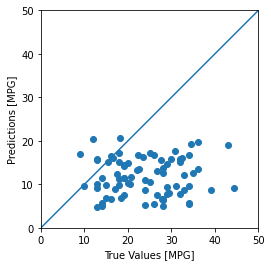

In [45]:
test_predictions = model.predict(test_ds).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


### Show Model Prediction Output

In [46]:
model_pred_outputs = {
    "pred": test_predictions,
    "actual_value": test_labels,
}
model_output_df = pd.DataFrame(model_pred_outputs)

In [47]:
model_output_df.head()

,pred,actual_value
0,9.930097,15.0
1,9.669165,10.0
2,16.972563,9.0
3,17.288105,25.0
4,11.458208,19.0


## 2. Model Evaluation 

### Preparing Regression Output for Binary Scoring Model Evaluation

- Create binary label for mileage prediction over 25 miles per gallon
    - 0 = Not Fuel Efficient, < 25 MPG
    - 1 = Fuel Efficient >= 25 MPG

In [48]:
# Convert Regression Output to binary classification output
model_output_df.head()

,pred,actual_value
0,9.930097,15.0
1,9.669165,10.0
2,16.972563,9.0
3,17.288105,25.0
4,11.458208,19.0


In [49]:
def convert_to_binary(df, pred_field, actual_field):
    df['score'] = df[pred_field].apply(lambda x: 1 if x>=25 else 0 )
    df['label_value'] = df[actual_field].apply(lambda x: 1 if x>=25 else 0)
    return df

In [50]:
binary_df = convert_to_binary(model_output_df, 'pred', 'actual_value')
binary_df.head()

,pred,actual_value,score,label_value
0,9.930097,15.0,0,0
1,9.669165,10.0,0,0
2,16.972563,9.0,0,0
3,17.288105,25.0,0,1
4,11.458208,19.0,0,0


### Classification Common Model Evaluation Metrics

In [51]:
from sklearn.metrics import brier_score_loss, accuracy_score, f1_score, classification_report, roc_auc_score, roc_curve

In [52]:
print(classification_report(binary_df['label_value'], binary_df['score']))

              precision    recall  f1-score   support

           0       0.53      1.00      0.69        41
           1       0.00      0.00      0.00        37

    accuracy                           0.53        78
   macro avg       0.26      0.50      0.34        78
weighted avg       0.28      0.53      0.36        78



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [53]:
#F1
f1_score(binary_df['label_value'], binary_df['score'], average='weighted')

0.3622064210299505

In [54]:
#AUC - area under the ROC curve
roc_auc_score(binary_df['label_value'], binary_df['score'])

0.5

### Brier Score

In [55]:
random_predictions = np.random.random((100))
random_predictions

array([0.59434772, 0.91139848, 0.71195396, 0.26080945, 0.04406788,
       0.50318732, 0.87777813, 0.11466986, 0.8657259 , 0.4244986 ,
       0.47464124, 0.54556424, 0.49143286, 0.50487154, 0.05848051,
       0.19583382, 0.56704885, 0.8165015 , 0.75180372, 0.35415463,
       0.11613827, 0.51527024, 0.87793411, 0.46581279, 0.85827482,
       0.75055161, 0.91398166, 0.12617428, 0.3767331 , 0.32254563,
       0.27577359, 0.78747217, 0.56618063, 0.80231646, 0.97290857,
       0.83916769, 0.58971058, 0.76330058, 0.05362082, 0.308007  ,
       0.67000164, 0.43034425, 0.56146678, 0.70251281, 0.00220074,
       0.85231315, 0.23272714, 0.6650673 , 0.19208596, 0.32926273,
       0.93298673, 0.03870592, 0.94428073, 0.04880638, 0.39589203,
       0.15832871, 0.28088245, 0.54195262, 0.17930954, 0.19189655,
       0.0574636 , 0.5011754 , 0.94486618, 0.72812337, 0.12516499,
       0.99824754, 0.46110939, 0.8363315 , 0.67260497, 0.6698217 ,
       0.48938252, 0.36490794, 0.68676974, 0.69886495, 0.69230

In [56]:
random_labels = np.random.choice([0, 1], 100)
random_labels

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1])

- Convert probability to binary predictions

In [57]:
probability_prediction_df = pd.DataFrame({"prob_prediction": random_predictions,
                "binary_prediction": np.array([ 1 if abs(x)>=0.5 else 0 for x in random_predictions], dtype=int),
                                "label": random_labels})

In [58]:
probability_prediction_df.head()

,prob_prediction,binary_prediction,label
0,0.594348,1,0
1,0.911398,1,0
2,0.711954,1,0
3,0.260809,0,1
4,0.044068,0,1


In [59]:
y_true = probability_prediction_df['label'].values 
y_pred = probability_prediction_df['binary_prediction'].values

In [60]:
acc = accuracy_score(y_true, y_pred)
print(acc)

0.46


In [61]:
bs_loss = brier_score_loss(y_true, probability_prediction_df['prob_prediction'])
print(bs_loss)

0.3370674029212967


### Misclassified

In [62]:
missclassified_df = probability_prediction_df[probability_prediction_df['binary_prediction']!=probability_prediction_df['label']]

In [63]:
missclassified_df.head(10)

,prob_prediction,binary_prediction,label
0,0.594348,1,0
1,0.911398,1,0
2,0.711954,1,0
3,0.260809,0,1
4,0.044068,0,1
6,0.877778,1,0
7,0.114670,0,1
8,0.865726,1,0
9,0.424499,0,1
10,0.474641,0,1


In [64]:
len(missclassified_df)

54

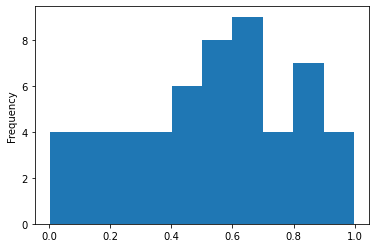

In [65]:
missclassified_df['prob_prediction'].plot(kind='hist')

## 3. Demographic Group Bias Analysis

- Select groups to analyze
- Prepare data 
- Analyze groups


### Select groups to analyze
- Selected 'origin' field which gives the country of origin for the car.

In [66]:
#combine binary df with original test df, order was not shuffled so can do

In [67]:
merged_binary_df = binary_df.assign(origin = test_data['Origin'].values)

In [68]:
merged_binary_df.head()

,pred,actual_value,score,label_value,origin
0,9.930097,15.0,0,0,USA
1,9.669165,10.0,0,0,USA
2,16.972563,9.0,0,0,USA
3,17.288105,25.0,0,1,Japan
4,11.458208,19.0,0,0,USA


### Prepare Data

In [69]:
# Aequitas
from aequitas.preprocessing import preprocess_input_df
from aequitas.group import Group
from aequitas.plotting import Plot
from aequitas.bias import Bias
from aequitas.fairness import Fairness

In [70]:
ae_df, _ = preprocess_input_df(merged_binary_df)
g = Group()
xtab, _ = g.get_crosstabs(ae_df)
absolute_metrics = g.list_absolute_metrics(xtab)
clean_xtab = xtab.fillna(-1)
aqp = Plot()
b = Bias()

model_id, score_thresholds 1 {'rank_abs': [0]}


The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


### Analyze Groups

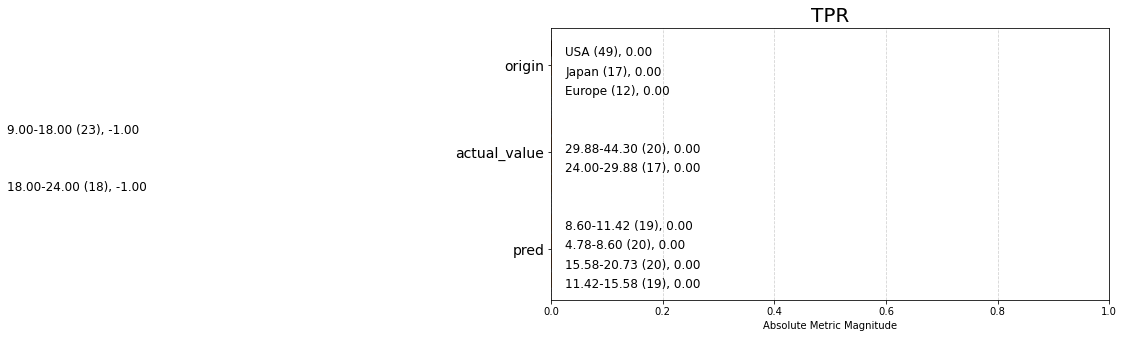

In [71]:
tpr = aqp.plot_group_metric(clean_xtab, 'tpr', min_group_size=0.05)

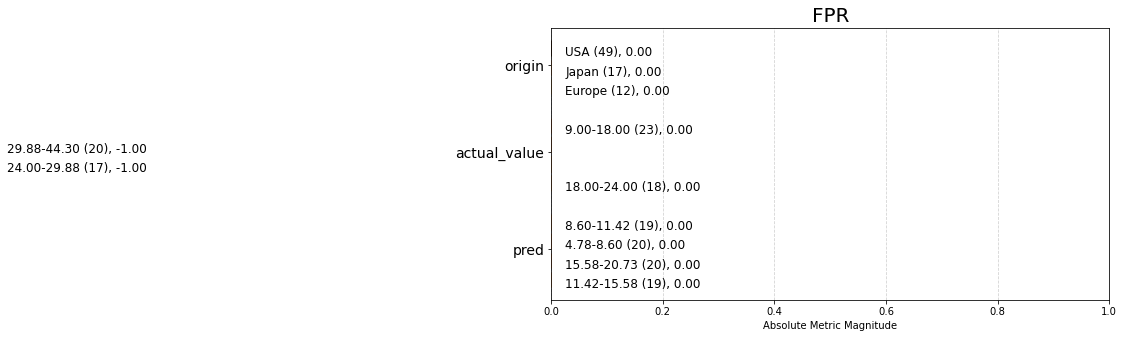

In [72]:
fpr = aqp.plot_group_metric(clean_xtab, 'fpr', min_group_size=0.05)

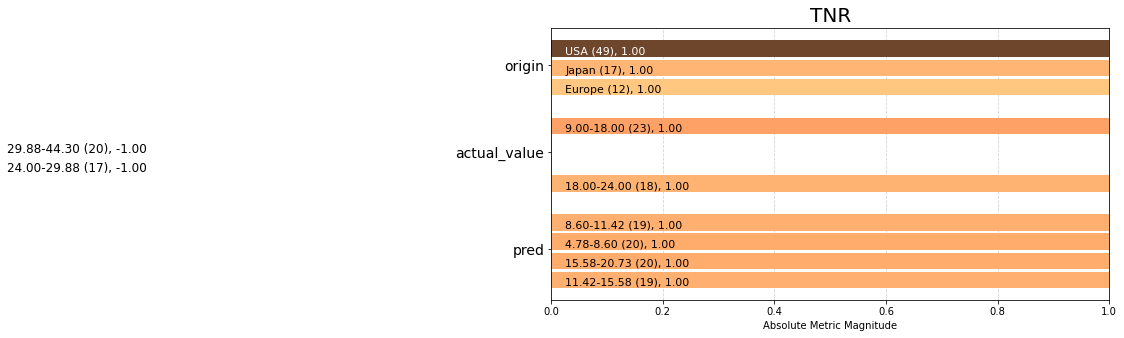

In [73]:
tnr = aqp.plot_group_metric(clean_xtab, 'tnr', min_group_size=0.05)

In [74]:
# Bias Report - http://aequitas.dssg.io/audit/eg1cp7ku/adult_rf_binary/

## 4. Train Uncertainty Estimation Model with TF Probability

### Instructions
- Using MPG model from earlier, create uncertainty estimation model with TF Probability.
- In particular, we will focus on building a model that accounts for Aleatoric Uncertainty.

In [75]:
import tensorflow_probability as tfp

### Aleatoric Uncertainty
- Known Unknowns
- 2 Main Changes to our network 
    - Add a second unit to the last dense layer before passing it to Tensorflow Probability layer to model for the predictor y and the heteroscedasticity or unequal scattering of data
    - DistributionLambda distribution mean and std
- DistributionLambda is a special Keras layer that uses a Python lambda to construct a distribution based on the layer inputs and the output of the final layer of the model is passed into the loss function. Lastly. this model will return a distribution for both mean and standard deviation.

In [76]:
train_label_stats = train_labels.describe()
train_label_stats

count    314.000000
mean      23.310510
std        7.728652
min       10.000000
25%       17.000000
50%       22.000000
75%       28.950000
max       46.600000
Name: MPG, dtype: float64

In [77]:
def build_seq_prob_model(feature_layer):
    model = tf.keras.Sequential([
        feature_layer,
        tf.keras.layers.Dense(150, activation='relu'),
        tf.keras.layers.Dense(75, activation='relu'),
        tf.keras.layers.Dense(1 + 1),
        tfp.layers.DistributionLambda(  
            lambda t:tfp.distributions.Normal(
                loc=t[..., :1],
                scale=1e-3 + tf.math.softplus(0.1 * t[...,1:])

            )
         )
  
        
        
    ])
    return model

def build_prob_model(train_ds,   feature_layer,  epochs=5, loss_metric='mse'):
    model = build_seq_prob_model(feature_layer)
    negloglik = lambda y, rv_y: -rv_y.log_prob(y)
    loss = negloglik
    model.compile(tf.optimizers.Adam(learning_rate=0.05), loss=loss, metrics=[loss_metric])
    history = model.fit(train_ds, 
                        epochs=epochs)
    return model, history

### Train Probability Model

In [78]:
prob_model, history = build_prob_model(train_ds, dense_feature_layer,  epochs=500)

Train for 3 steps
Epoch 1/500
3/3 [==============================] - 1s 181ms/step - loss: 303.0258 - mse: 448.4494
Epoch 2/500
3/3 [==============================] - 0s 8ms/step - loss: 15.3955 - mse: 2158.5059
Epoch 3/500
3/3 [==============================] - 0s 8ms/step - loss: 16.2693 - mse: 11256.1338
Epoch 4/500
3/3 [==============================] - 0s 9ms/step - loss: 10.7292 - mse: 18176.8984
Epoch 5/500
3/3 [==============================] - 0s 9ms/step - loss: 7.3347 - mse: 16797.2969
Epoch 6/500
3/3 [==============================] - 0s 9ms/step - loss: 5.7666 - mse: 11210.0000
Epoch 7/500
3/3 [==============================] - 0s 9ms/step - loss: 5.2580 - mse: 6194.3135
Epoch 8/500
3/3 [==============================] - 0s 10ms/step - loss: 5.2381 - mse: 9727.0752
Epoch 9/500
3/3 [==============================] - 0s 8ms/step - loss: 5.4087 - mse: 9557.7617
Epoch 10/500
3/3 [==============================] - 0s 8ms/step - loss: 5.6027 - mse: 15417.9805
Epoch 11/500
3/3 [=

### Extract Mean and Standard Deviation Output

In [79]:
feature_column_list = categorical_feature_list + numerical_feature_list
x_tst = dict(test_data[feature_column_list])
yhat = prob_model(x_tst)
prob_preds = prob_model.predict(test_ds)
m = yhat.mean()
s = yhat.stddev()

In [80]:
test_data

,Origin,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear
0,USA,15.0,1.483887,1.865988,2.234620,1.018782,-2.530891,-1.604642
1,USA,10.0,1.483887,1.578444,2.890853,1.925289,-0.559020,-1.604642
2,USA,9.0,1.483887,1.041693,2.313368,2.063931,1.054328,-1.604642
3,Japan,25.0,-0.869348,-0.789008,-0.259066,-0.903250,-0.559020,-1.332580
4,USA,19.0,0.307270,0.351586,-0.127819,-0.422150,-0.917542,-1.332580
...,...,...,...,...,...,...,...,...
73,USA,34.0,-0.869348,-0.798593,-0.442811,-0.705359,0.875068,1.660094
74,Europe,36.0,-0.869348,-0.865687,-0.810302,-1.197124,-0.092942,1.660094
75,Japan,34.0,-0.869348,-0.836932,-0.915299,-0.883106,0.480693,1.660094
76,Japan,32.0,-0.869348,-0.999874,-0.994047,-1.214899,0.050467,1.660094


In [81]:
x_tst

{'Origin': 0        USA
 1        USA
 2        USA
 3      Japan
 4        USA
        ...  
 73       USA
 74    Europe
 75     Japan
 76     Japan
 77       USA
 Name: Origin, Length: 78, dtype: object,
 'Cylinders': 0     1.483887
 1     1.483887
 2     1.483887
 3    -0.869348
 4     0.307270
         ...   
 73   -0.869348
 74   -0.869348
 75   -0.869348
 76   -0.869348
 77   -0.869348
 Name: Cylinders, Length: 78, dtype: float64,
 'Displacement': 0     1.865988
 1     1.578444
 2     1.041693
 3    -0.789008
 4     0.351586
         ...   
 73   -0.798593
 74   -0.865687
 75   -0.836932
 76   -0.999874
 77   -0.721914
 Name: Displacement, Length: 78, dtype: float64,
 'Horsepower': 0     2.234620
 1     2.890853
 2     2.313368
 3    -0.259066
 4    -0.127819
         ...   
 73   -0.442811
 74   -0.810302
 75   -0.915299
 76   -0.994047
 77   -0.679055
 Name: Horsepower, Length: 78, dtype: float64,
 'Weight': 0     1.018782
 1     1.925289
 2     2.063931
 3    -0.903250
 4    -

In [82]:
m[0:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[14.101591 ],
       [10.342923 ],
       [10.400306 ],
       [24.886106 ],
       [17.598883 ],
       [13.4846115],
       [13.843864 ],
       [12.779689 ],
       [17.894827 ],
       [30.605047 ]], dtype=float32)>

In [83]:
s[0:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.8528711 ],
       [0.74733096],
       [0.7407799 ],
       [1.1254848 ],
       [1.1057969 ],
       [0.81608677],
       [0.81191146],
       [0.82876855],
       [1.0862014 ],
       [2.640025  ]], dtype=float32)>

In [84]:
prob_outputs = {
    "pred": prob_preds.flatten(),
    "actual_value": test_data['MPG'].values,
    "pred_mean": m.numpy().flatten(),
    "pred_std": s.numpy().flatten()
}
prob_output_df = pd.DataFrame(prob_outputs)

In [85]:
prob_output_df.head()

,pred,actual_value,pred_mean,pred_std
0,18.006226,15.0,14.101591,0.852871
1,40.629242,10.0,10.342923,0.747331
2,12.851608,9.0,10.400306,0.740780
3,30.515001,25.0,24.886106,1.125485
4,42.151760,19.0,17.598883,1.105797


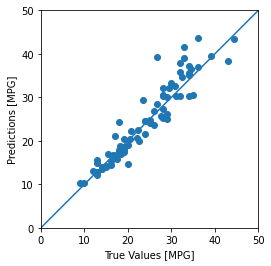

In [86]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, m.numpy().flatten())
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


## 5. Model Interpretability with Shapley Values

- Using Open Source Library Shap - https://github.com/slundberg/shap
- Developed by Su-In Lee's lab at the University of Washington, and Microsoft Research

In [87]:
# adapted from https://github.com/kweinmeister/notebooks/blob/master/tensorflow-shap-college-debt.ipynb
# https://towardsdatascience.com/understand-how-your-tensorflow-model-is-making-predictions-d0b3c7e88500

In [88]:
import shap
shap.initjs()

### Train Model without Dense Features

In [89]:
def build_shap_model( num_features):
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[num_features]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [90]:
shap_num_features = len( numerical_feature_list)
shap_feature_columns =  tf_numerical_feature_list
#shap_feature_layer = tf.keras.layers.DenseFeatures(shap_feature_columns)
shap_model = build_shap_model( shap_num_features)

In [91]:
EPOCHS = 1000
early_stop = tf.keras.callbacks.EarlyStopping(monitor='mse', patience=10)     
shap_history = shap_model.fit( normed_train_data, train_labels,  callbacks=[early_stop], epochs=EPOCHS,  verbose=1)

Train on 314 samples
Epoch 1/1000
314/314 [==============================] - 0s 1ms/sample - loss: 576.8470 - mae: 22.7915 - mse: 576.8470
Epoch 2/1000
314/314 [==============================] - 0s 58us/sample - loss: 527.1292 - mae: 21.6839 - mse: 527.1292
Epoch 3/1000
314/314 [==============================] - 0s 60us/sample - loss: 474.5976 - mae: 20.4608 - mse: 474.5975
Epoch 4/1000
314/314 [==============================] - 0s 59us/sample - loss: 414.4369 - mae: 18.9709 - mse: 414.4370
Epoch 5/1000
314/314 [==============================] - 0s 56us/sample - loss: 347.7323 - mae: 17.1900 - mse: 347.7322
Epoch 6/1000
314/314 [==============================] - 0s 58us/sample - loss: 277.2444 - mae: 15.1273 - mse: 277.2444
Epoch 7/1000
314/314 [==============================] - 0s 61us/sample - loss: 207.8515 - mae: 12.9518 - mse: 207.8515
Epoch 8/1000
314/314 [==============================] - 0s 61us/sample - loss: 146.3610 - mae: 10.7945 - mse: 146.3610
Epoch 9/1000
314/314 [======

### Use KMeans to Summarize Dataset

In [92]:
df_train_normed_summary = shap.kmeans(normed_train_data.values, 25)


In [93]:
# Instantiate an explainer with the model predictions and training data summary
explainer = shap.KernelExplainer(shap_model.predict, df_train_normed_summary)

In [94]:
# may need to install ipywidgets to see status visualization
'''
pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension
'''

'\npip install ipywidgets\njupyter nbextension enable --py widgetsnbextension\n'

In [95]:
#pip install ipywidgets

In [96]:
#pip install jupyter nbextension enable --py widgetsnbextension

In [97]:
# Extract Shapley values from the explainer
shap_values = explainer.shap_values(normed_train_data.values)

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


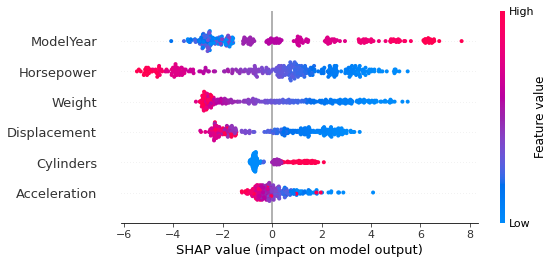

In [98]:
# Summarize the Shapley values in a plot
shap.summary_plot(shap_values[0], normed_train_data)

In [99]:
INSTANCE_NUM = 0
shap.force_plot(explainer.expected_value[0], shap_values[0][INSTANCE_NUM], normed_train_data.iloc[INSTANCE_NUM,:])

In [100]:
# Plot the SHAP values for multiple instances
NUM_ROWS = 10
shap.force_plot(explainer.expected_value[0], shap_values[0][0:NUM_ROWS], normed_train_data.iloc[0:NUM_ROWS])